## Observations and Insights 

In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count=len(mouse_metadata)
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemice = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicatemice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupmouse_df = merge_df.loc[merge_df["Mouse ID"] == "g989"]
len(dupmouse_df)

13

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df.drop(merge_df[merge_df['Mouse ID'] == "g989"].index)

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].value_counts()

k483    10
g288    10
k210    10
i177    10
a897    10
        ..
v199     1
u153     1
x226     1
d133     1
b447     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_df=clean_df.groupby(["Drug Regimen"])
tumor_mean=pd.DataFrame(drug_df["Tumor Volume (mm3)"].mean())
tumor_median=pd.DataFrame(drug_df["Tumor Volume (mm3)"].median())
tumor_var=pd.DataFrame(drug_df["Tumor Volume (mm3)"].var())
tumor_std=pd.DataFrame(drug_df["Tumor Volume (mm3)"].std())
tumor_SEM=pd.DataFrame(drug_df["Tumor Volume (mm3)"].sem())
#Label colums
tumor_mean=tumor_mean.rename(columns={"Tumor Volume (mm3)": "Mean"})
tumor_median=tumor_median.rename(columns={"Tumor Volume (mm3)": "Median"})
tumor_var=tumor_var.rename(columns={"Tumor Volume (mm3)": "Varience"})
tumor_std=tumor_std.rename(columns={"Tumor Volume (mm3)": "Standard Deviation"})
tumor_SEM=tumor_SEM.rename(columns={"Tumor Volume (mm3)": "SEM"})
#Merge data frames
#summary_df1 = pd.merge(tumor_mean, tumor_median, on="Drug Regimen")
#summary_df2 =pd.merge(tumor_var, tumor_std, on="Drug Regimen")
#summary_df3 =pd.merge(summary_df1, summary_df2, on="Drug Regimen")
#summary_df=pd.merge(summary_df3, tumor_SEM, on="Drug Regimen")
drug_stats=[tumor_mean, tumor_median, tumor_var, tumor_std, tumor_SEM]
summary_df=pd.concat(drug_stats, axis=1)
summary_df


,Mean,Median,Varience,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_df=pd.concat(drug_stats, axis=1, join='outer')
summary_df

,Mean,Median,Varience,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Total Mice')

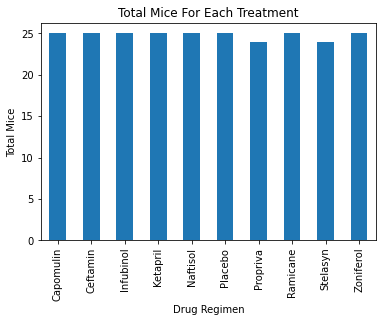

In [9]:
# Count mice in each treatment group
mouse_count=pd.DataFrame(clean_df.groupby("Drug Regimen")['Mouse ID'].nunique())
mouse_count=mouse_count.rename(columns={"Mouse ID":"Total Mice"})

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
mouse_count=mouse_count.reset_index()
mouse_count.plot(x ="Drug Regimen", y="Total Mice", kind = "bar", legend=False)
plt.title("Total Mice For Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")

([<matplotlib.axis.XTick at 0x22ddf289fa0>,
 <a list of 10 Text major ticklabel objects>)

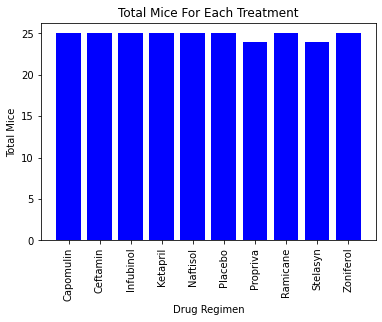

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs=mouse_count["Drug Regimen"]
mice=mouse_count["Total Mice"]

plt.bar(drugs, mice, color="b")

# Give the chart a title, x label, and y label
plt.title("Total Mice For Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")

plt.xticks(drugs, rotation=90)

Text(0, 0.5, '')

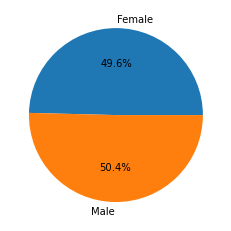

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice=pd.DataFrame(clean_df.groupby("Sex")["Mouse ID"].nunique())
mice=mice.rename(columns={"Mouse ID":"Mice"})
pie = mice.plot.pie(y="Mice", autopct="%1.1f%%", legend=False, figsize=(4, 4))
pie.set_ylabel('')

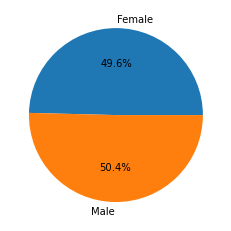

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female","Male"]
pie=plt.pie(mice["Mice"], autopct="%1.1f%%", labels=labels)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp=clean_df.groupby("Mouse ID")['Timepoint'].max()
last_tp
#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_tp = pd.merge(clean_df, last_tp, on="Mouse ID")
clean_tp=clean_tp[clean_tp['Timepoint_x']==clean_tp['Timepoint_y']]

#Filter out other treatment regimens
top_4=clean_tp[clean_tp["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_4

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1784,x822,Ceftamin,Male,3,29,45,61.386660,3,45
1800,y163,Infubinol,Female,17,27,45,67.685569,3,45
1832,y769,Ceftamin,Female,6,27,45,68.594745,4,45
1842,y865,Ceftamin,Male,23,26,45,64.729837,3,45


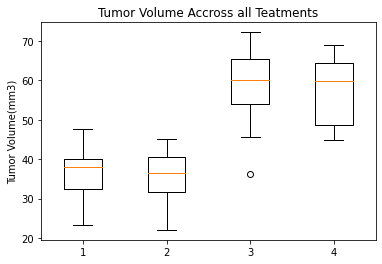

In [65]:
Capomulin=top_4.loc[top_4["Drug Regimen"]=="Capomulin"]
Ramicane=top_4.loc[top_4["Drug Regimen"]=="Ramicane"]
Infubinol=top_4.loc[top_4["Drug Regimen"]=="Infubinol"]
Ceftamin=top_4.loc[top_4["Drug Regimen"]=="Ceftamin"]

data_1=Capomulin["Tumor Volume (mm3)"]
data_2=Ramicane["Tumor Volume (mm3)"]
data_3=Infubinol["Tumor Volume (mm3)"]
data_4=Ceftamin["Tumor Volume (mm3)"]
   

data = [data_1, data_2, data_3, data_4]  
# Creating plot 

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Accross all Teatments')
ax1.set_ylabel('Tumor Volume(mm3)')
ax1.boxplot(data, showfliers=True)
plt.show() 




In [14]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments=top_4["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
#tumor_volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_vol=top_4['Tumor Volume (mm3)']
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")
print(f"The IQR={iqr}.")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    

# Determine outliers using upper and lower bounds
outliers=top_4.loc[(top_4['Tumor Volume (mm3)']<lower_bound) & (top_4['Tumor Volume (mm3)']<upper_bound)]
print(f"The maximum tumor volume is {tumor_vol.max()}")
print(f"The minimum tumor volume is {tumor_vol.min()}")
if tumor_vol.max()>upper_bound:
    print(f"Upper outliers my be{top_4['Tumor Volume (mm3)']<upper_bound}.")
else:
    print("According to this data, there appears to be no upper outliers.")
if tumor_vol.max()>upper_bound:
    print(f"Lower outliers my be{top_4['Tumor Volume (mm3)']<lower_bound}.")
else:
    print("According to this data, there appears to be no lower outliers.")


The lower quartile of occupancy is: 37.187743802499995
The upper quartile of occupancy is: 59.930261755000004
The interquartile range of occupancy is: 22.74251795250001
The the median of occupancy is: 45.0 
The IQR=22.74251795250001.
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.
The maximum tumor volume is 72.2267309
The minimum tumor volume is 22.05012627
According to this data, there appears to be no upper outliers.
According to this data, there appears to be no lower outliers.


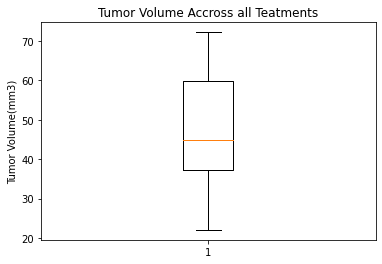

In [15]:
#Display box plot for Tumor volume accross all treatments
tumor_vol=top_4['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Accross all Teatments')
ax1.set_ylabel('Tumor Volume(mm3)')
ax1.boxplot(tumor_vol, showfliers=True)
plt.show()     

The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The the median of occupancy is: 36.56165229 
The IQR=9.098536719999998.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The maximum tumor volume is 45.22086888
The minimum tumor volume is 22.05012627
According to this data, there appears to be no upper outliers.
According to this data, there appears to be no lower outliers.


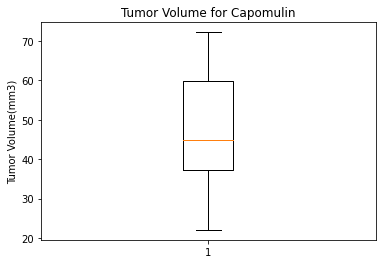

In [17]:
#Create box plot for Capomulin
Capomulin=top_4.loc[top_4["Drug Regimen"]=="Capomulin"]

tumor_vol=Capomulin['Tumor Volume (mm3)']
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")
print(f"The IQR={iqr}.")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    
print(f"The maximum tumor volume is {tumor_vol.max()}")
print(f"The minimum tumor volume is {tumor_vol.min()}")
if tumor_vol.max()>upper_bound:
    print(f"Upper outliers my be{Capomulin['Tumor Volume (mm3)']<upper_bound}.")
else:
    print("According to this data, there appears to be no upper outliers.")
if tumor_vol.max()>upper_bound:
    print(f"Lower outliers my be{Capomulin['Tumor Volume (mm3)']<lower_bound}.")
else:
    print("According to this data, there appears to be no lower outliers.")
outliers=Capomulin.loc[(Capomulin['Tumor Volume (mm3)']<lower_bound) & (Capomulin['Tumor Volume (mm3)']<upper_bound)]

tumor_vol=top_4['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Capomulin')
ax1.set_ylabel('Tumor Volume(mm3)')
ax1.boxplot(tumor_vol, showfliers=True)
plt.show()   


The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The the median of occupancy is: 36.56165229 
The IQR=9.098536719999998.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The maximum tumor volume is 45.22086888
The minimum tumor volume is 22.05012627
According to this data, there appears to be no upper outliers.
According to this data, there appears to be no lower outliers.


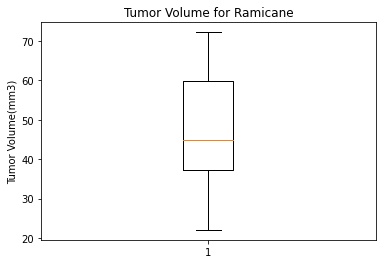

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
59,s508,Ramicane,Male,1,17,45,30.276232,0,45
74,m546,Ramicane,Male,18,16,45,30.564625,1,45
84,z578,Ramicane,Male,11,16,45,30.638696,0,45
94,j913,Ramicane,Female,4,17,45,31.560470,1,45
114,n364,Ramicane,Male,4,17,45,31.095335,1,45
154,c758,Ramicane,Male,9,17,45,33.397653,1,45
174,a644,Ramicane,Female,7,17,45,32.978522,1,45
184,i177,Ramicane,Male,10,18,45,33.562402,3,45


In [18]:
#Create box plot for Ramicane
Ramicane=top_4.loc[top_4["Drug Regimen"]=="Ramicane"]

tumor_vol=Ramicane['Tumor Volume (mm3)']
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")
print(f"The IQR={iqr}.")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    
print(f"The maximum tumor volume is {tumor_vol.max()}")
print(f"The minimum tumor volume is {tumor_vol.min()}")
if tumor_vol.max()>upper_bound:
    print(f"Upper outliers my be{Ramicane['Tumor Volume (mm3)']<upper_bound}.")
else:
    print("According to this data, there appears to be no upper outliers.")
if tumor_vol.max()>upper_bound:
    print(f"Lower outliers my be{Ramicane['Tumor Volume (mm3)']<lower_bound}.")
else:
    print("According to this data, there appears to be no lower outliers.")
outliers=Ramicane.loc[(Ramicane['Tumor Volume (mm3)']<lower_bound) & (Ramicane['Tumor Volume (mm3)']<upper_bound)]

tumor_vol=top_4['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Ramicane')
ax1.set_ylabel('Tumor Volume(mm3)')
ax1.boxplot(tumor_vol, showfliers=True)
plt.show()   
Ramicane

The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The the median of occupancy is: 60.16518046 
The IQR=11.477135160000003.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The maximum tumor volume is 72.2267309
The minimum tumor volume is 36.321345799999996
According to this data, there appears to be no upper outliers.
Upper outliers my beMouse ID              NaN
Drug Regimen          NaN
Sex                   NaN
Age_months            NaN
Weight (g)            NaN
Timepoint_x           NaN
Tumor Volume (mm3)    NaN
Metastatic Sites      NaN
Timepoint_y           NaN
upper_outlier         NaN
Name: True, dtype: object.


<ipython-input-34-227579b701d5>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Infubinol["upper_outlier"]=bu


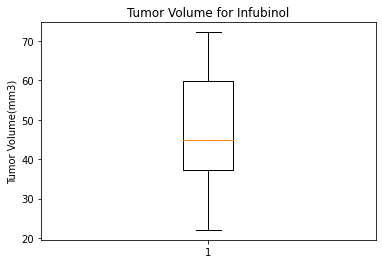

In [34]:
#Create box plot for Infubinol
Infubinol=top_4.loc[top_4["Drug Regimen"]=="Infubinol"]

tumor_vol=Infubinol['Tumor Volume (mm3)']
quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")
print(f"The IQR={iqr}.")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    
print(f"The maximum tumor volume is {tumor_vol.max()}")
print(f"The minimum tumor volume is {tumor_vol.min()}")

bu=Infubinol['Tumor Volume (mm3)']>lower_bound
Infubinol["upper_outlier"]=bu

if tumor_vol.max()>upper_bound:
    
    df= pd.dataframe(Infubinol, index=bu)
    print(f"Upper outliers my be{df.loc[True]}.")
else:
    print("According to this data, there appears to be no upper outliers.")

bl=Infubinol['Tumor Volume (mm3)']<lower_bound

if tumor_vol.min()<lower_bound:
    bl=Infubinol['Tumor Volume (mm3)']<lower_bound
    df= pd.DataFrame(Infubinol, index=bl)
    print(f"Upper outliers my be{df.loc[True]}.")
else:
   print("According to this data, there appears to be no lower outliers.")

#outliers=Infubinol.loc[(Infubinol['Tumor Volume (mm3)']<lower_bound) & (Infubinol['Tumor Volume (mm3)']<upper_bound)]

tumor_vol=top_4['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Infubinol')
ax1.set_ylabel('Tumor Volume(mm3)')
ax1.boxplot(tumor_vol, showfliers=True)
plt.show()   


In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# importing pandas as pd 
import pandas as pd 
   
# dictionary of lists 
dict = {'name':["aparna", "pankaj", "sudhir", "Geeku"], 
        'degree': ["MBA", "BCA", "M.Tech", "MBA"], 
        'score':[90, 40, 80, 98]} 
  
# creating a dataframe with boolean index  
df = pd.DataFrame(dict, index = [True, False, True, False]) 
  
# accessing a dataframe using .loc[] function  
print(df.loc[True])

        name  degree  score
True  aparna     MBA     90
True  sudhir  M.Tech     80


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
